# Sentiment Analysis of Movie Reviews

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import Counter

import nltk
from nltk.corpus import stopwords

## Data Preprocessing

In [110]:
df = pd.read_csv('data/raw/IMDB Dataset.csv')

In [111]:
df = df.head(5001)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
4996,i watched this series when it first came out i...,positive
4997,Once again Jet Li brings his charismatic prese...,positive
4998,"I rented this movie, after hearing Chris Gore ...",negative
4999,This was a big disappointment for me. I think ...,negative


In [112]:
df['sentiment'].value_counts()

sentiment
negative    2532
positive    2469
Name: count, dtype: int64

We have 25000 positive review and 25000 negative reviews

In [113]:
example = df['review'][0]
print(example)

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [114]:
# Splits up the review and provides a list of those words
# NLTK approach
# tokens = nltk.word_tokenize(example)
# tokens[:10]

def tokenize_and_clean_review(review):
    stop_words = set(stopwords.words('english'))
    tokens = review.split()
    table = str.maketrans('', '', string.punctuation)
    tokens = [word.translate(table) for word in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if not word.lower() in stop_words]
    tokens = [word.lower() for word in tokens if len(word) > 1]
    return tokens

tokens = tokenize_and_clean_review(example)
tokens[:10]

['one',
 'reviewers',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'youll',
 'hooked',
 'right',
 'exactly']

## Bag of words approach for sentiment scoring

In [120]:
# Building bag of words for all reviews
full_bow = Counter()
for review in df['review']:
    tokens = tokenize_and_clean_review(review)
    bow = Counter(tokens)
    full_bow.update(bow)

print(full_bow.most_common(50))

[('br', 11593), ('movie', 8467), ('film', 7383), ('one', 5039), ('like', 3880), ('good', 2896), ('even', 2468), ('would', 2462), ('see', 2286), ('time', 2261), ('story', 2258), ('really', 2247), ('well', 1949), ('much', 1947), ('get', 1889), ('bad', 1826), ('first', 1752), ('also', 1743), ('people', 1716), ('great', 1715), ('dont', 1663), ('movies', 1568), ('make', 1567), ('way', 1561), ('made', 1556), ('films', 1479), ('could', 1455), ('characters', 1431), ('watch', 1376), ('think', 1375), ('never', 1340), ('little', 1314), ('many', 1291), ('character', 1289), ('seen', 1277), ('plot', 1267), ('two', 1248), ('know', 1225), ('acting', 1224), ('best', 1222), ('love', 1182), ('ever', 1162), ('show', 1155), ('life', 1145), ('scene', 1086), ('better', 1082), ('still', 1061), ('say', 1059), ('something', 1016), ('go', 1003)]


In [87]:
# Finding part of speech for each token
# NLTK approach
tagged_tokens = nltk.pos_tag(tokens)
tagged_tokens[:10]


[('MYSTERY', 'NNP'),
 ('MEN', 'NNP'),
 ('got', 'VBD'),
 ('stupidest', 'JJS'),
 ('film', 'NN'),
 ('Ive', 'NNP'),
 ('ever', 'RB'),
 ('seen', 'VBN'),
 ('film', 'NN'),
 ('thought', 'VBD')]

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [10]:
sia.polarity_scores(example)

{'neg': 0.203, 'neu': 0.748, 'pos': 0.048, 'compound': -0.9951}

In [11]:
sentiment_scores = [sia.polarity_scores(review) for review in df['review']]
sentiment_scores = pd.DataFrame(sentiment_scores)
vaders = df.join(sentiment_scores)

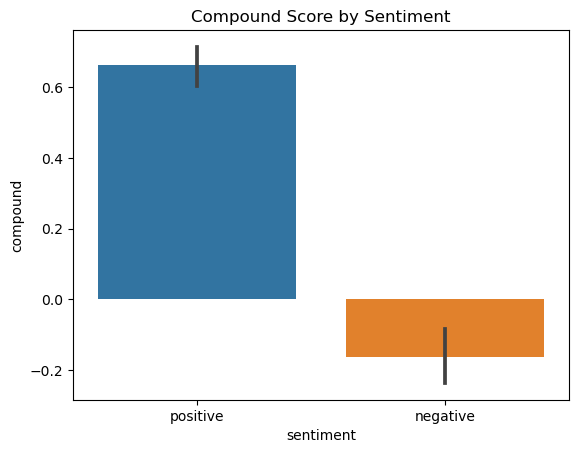

In [18]:
ax = sns.barplot(data=vaders, x='sentiment', y = 'compound')
ax.set_title('Compound Score by Sentiment')
plt.show()